In [1]:
import numpy as np
import matplotlib.pyplot as plt
import macti.visual as mvis

In [2]:
def mesh(L,N):
    x = np.linspace(0,L,N+2)
    return L/(N + 1), x

def plot_sol(x, T, xa, Ta):
    plt.figure(figsize=(10,5))

    plt.plot(xa,Ta,'k-', lw = 2.0, label='Analítica')
    plt.scatter(x, T, zorder=5, s=100, fc='C1', ec='k', alpha=0.75, label='Numérica')
    plt.plot(x,T, '--', lw=1.0)

    plt.xlabel('x [m]')
    plt.ylabel('T')
    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [15]:
def Laplaciano1D(N, h, Gamma, u, T0, TL):
    
    #b = -u / (2*h) + Gamma / h**2
    #c =  u / (2*h) + Gamma / h**2 
    #a = b + c
    ce=max(-u/h,0)
    cw=max(u/h,0)
    b=ce+Gamma/h**2
    c=cw+Gamma/h**2
    a=b+c

    
    # Matriz del sistema
    A = np.zeros((N,N))
    A[0,0] = a 
    A[0,1] = -b
    for i in range(1,N-1):
        A[i,i] = a 
        A[i,i+1] = -b
        A[i,i-1] = -c
    A[N-1,N-2] = -c
    A[N-1,N-1] = a
    
    # RHS del sistema
    f = np.zeros(N)         
    f[0]   = T0 * c
    f[N-1] = TL * b
    
    return A, f

In [4]:
def analytic_sol(par, NP = 100):
    L     = par['L']
    rho   = par['rho']
    u     = par['u']
    Gamma = par['Gamma']
    T0  = par['BC'][0]
    TL  = par['BC'][1]
    
    xa = np.linspace(0, L, NP)
    Ta = (np.exp(rho * u * xa / Gamma) - 1) / (np.exp(rho * u * L / Gamma) - 1) * (TL - T0) + T0
    return (xa, Ta) 

In [5]:
def fdm_sol(par):
    L     = par['L']
    Gamma = par['Gamma']
    rho   = par['rho']
    u     = par['u']
    N     = par['N']
    T0  = par['BC'][0]
    TL  = par['BC'][1]
    h     = par['h']
    
    A, f = Laplaciano1D(N, h, Gamma, u, T0, TL) 

    T = np.zeros(N+2)

    T[1:N+1] = np.linalg.solve(A,f)

    T[0] = T0
    T[N+1] = TL

    return T

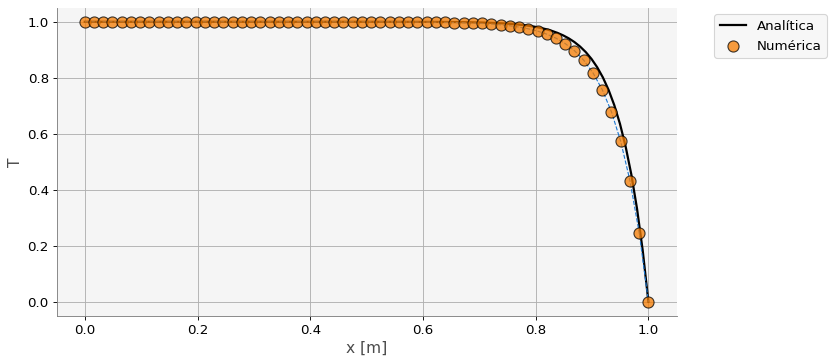

In [17]:
par = {}
par['L']     = 1.0 # m
par['rho']   = 1.0 # kg/m^3
par['u']     = 2.0 # m/s
par['Gamma'] = 0.1 # kg / m.s
par['BC']    = (1.0, 0.0)
par['N']     = 60 # Número de incógnitas

h, x = mesh(par['L'], par['N'])

par['h'] = h

xa, Ta = analytic_sol(par)

plot_sol(x, fdm_sol(par), xa, Ta)